Te invitan a hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Cuentas con:

- registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
- un archivo con los pedidos en este periodo;
- estadísticas de gastos de marketing.

Lo que vas a investigar: 

- cómo los clientes usan el servicio;
- cuándo empiezan a comprar;
- cuánto dinero aporta cada cliente a la compañía;
- cuándo los ingresos cubren el costo de adquisición de los clientes.

#### Descripción de los datos

* La tabla visits (registros del servidor con datos sobre las visitas al sitio web):
    * Uid: identificador único del usuario.
    * Device: dispositivo del usuario.
    * Start Ts: fecha y hora de inicio de la sesión.
    * End Ts: fecha y hora de término de la sesión.
    * Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
    * Todas las fechas de esta tabla están en formato AAAA-MM-DD.

* La tabla orders (datos sobre pedidos):

    * Uid: identificador único del usuario que realiza un pedido.
    * Buy Ts: fecha y hora del pedido. 
    * Revenue: el ingreso de Showz por el pedido.

* La tabla costs (datos sobre gastos de marketing):

    * source_id: identificador de la fuente de anuncios.
    * dt: fecha.
    * costs: gastos en esta fuente de anuncios en este día.

## 1) Acceder a los datos y prepararlos para el posterior análisis


In [732]:
#importo librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Accedo a los datos y preparo los DataFrames

visits = pd.read_csv('visits_log_us.csv')
costs = pd.read_csv('costs_us.csv')
orders = pd.read_csv('orders_log_us.csv')

In [733]:
#observo DF visitas
print(visits.head(5))
print(visits.info())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage

In [734]:
#busco datos nulos y duplicados:
print('datos duplicados: ', visits.duplicated().sum())
print('datos nulos: ', visits.isnull().sum())

datos duplicados:  0
datos nulos:  Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64


In [735]:
# paso las columnas a minusculas y reemplazo espacios por guiones bajos
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [736]:
#paso a DT las columnas con fecha y horario
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])


In [737]:
#creo columnas dia, semana,mes y año
visits['date'] = visits['start_ts'].dt.date
visits['day'] = visits['start_ts'].dt.isocalendar().day
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.isocalendar().year

In [738]:
#observo DF ordenes
print(orders.head(5))
print(orders.info())

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [739]:
#busco datos nulos y duplicados
print('datos duplicados: ', orders.duplicated().sum())
print('datos nulos: ', orders.isnull().sum())

datos duplicados:  0
datos nulos:  Buy Ts     0
Revenue    0
Uid        0
dtype: int64


In [740]:
#transformo las columnas a minusculas y reemplazo espacios por guiones bajos
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [741]:
#transformo la columna date al tipo datetime
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])


In [742]:
#creo columna fecha
orders['date'] = orders['buy_ts'].dt.date

In [743]:
#observo DF costs
print(costs.head(5))
print(costs.info())

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


In [744]:
#busco datos nulos y duplicados:
print('datos duplicados: ', orders.duplicated().sum())
print('datos nulos: ', orders.isnull().sum())

datos duplicados:  0
datos nulos:  buy_ts     0
revenue    0
uid        0
date       0
dtype: int64


In [745]:
#transformo la columna dt a datetime
costs['dt'] = pd.to_datetime(costs['dt'])
#renombre dt a date para poder coombinar mejor con otros DF
costs.rename(columns={'dt': 'date'}, inplace=True)
#creo columna mes
costs['month'] = costs['date'].dt.to_period('M')



## 2) Informes y cálculo de métricas 

### Visitas:
* ¿Cuántas personas lo usan cada día, semana y mes?
* ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
* ¿Cuál es la duración de cada sesión?
* ¿Con qué frecuencia los usuarios regresan?

In [746]:
#Cantidad total de usuarios únicos por fecha, semana y mes
day_users = visits.groupby('date')['uid'].nunique().sort_values(ascending=False)
week_users = visits.groupby(['week', 'year'])['uid'].nunique().sort_values(ascending=False)
month_users = visits.groupby(['month', 'year'])['uid'].nunique().sort_values(ascending=False)
print("""Cantidad total de usuarios únicos por día:
    """, day_users.head(10),
    """
Cantidad total de usuarios únicos por semana:
    """, 
    week_users.head(10),
    """

Cantidad total de usuarios únicos por mes:
    """, 
    month_users.head(10))

Cantidad total de usuarios únicos por día:
     date
2017-11-24    3319
2018-05-31    1997
2017-11-25    1817
2018-02-01    1640
2018-03-26    1609
2017-11-16    1604
2017-11-27    1571
2018-03-27    1551
2018-03-25    1545
2017-12-07    1524
Name: uid, dtype: int64 
Cantidad total de usuarios únicos por semana:
     week  year
47    2017    10586
49    2017     8407
50    2017     8214
48    2017     8166
46    2017     8117
5     2018     8111
6     2018     7908
12    2018     7898
52    2017     7774
7     2018     7759
Name: uid, dtype: int64 

Cantidad total de usuarios únicos por mes:
     month  year
11     2017    32797
12     2017    31557
10     2017    29692
2      2018    28749
1      2018    28716
3      2018    27473
4      2018    21008
5      2018    20701
9      2017    18975
7      2017    14183
Name: uid, dtype: int64


In [747]:
#Calculo DAU (Daily Active Users), es decir, cantidad de usuarios únicos que visitan el sitio por dia
DAU = visits.groupby('date')['uid'].nunique().mean()
print('DAU (promedio usuarios activos por día): ', DAU.round(2))
#Calculo WAU (Weekly Active Users), es decir, cantidad de usuarios únicos que visitan el sitio por semana
WAU = visits.groupby(['year', 'week'])['uid'].nunique().mean()
print('WAU (promedio usuarios activos por semana): ', WAU.round(2))
#Calculo MAU (Monthly Active Users), es decir, cantidad de usuarios únicos que visitan el sitio por mes
MAU = visits.groupby(['year', 'month'])['uid'].nunique().mean()
print('MAU (promedio usuarios activos por mes): ', MAU.round(2))

DAU (promedio usuarios activos por día):  907.99
WAU (promedio usuarios activos por semana):  5716.25
MAU (promedio usuarios activos por mes):  23228.42


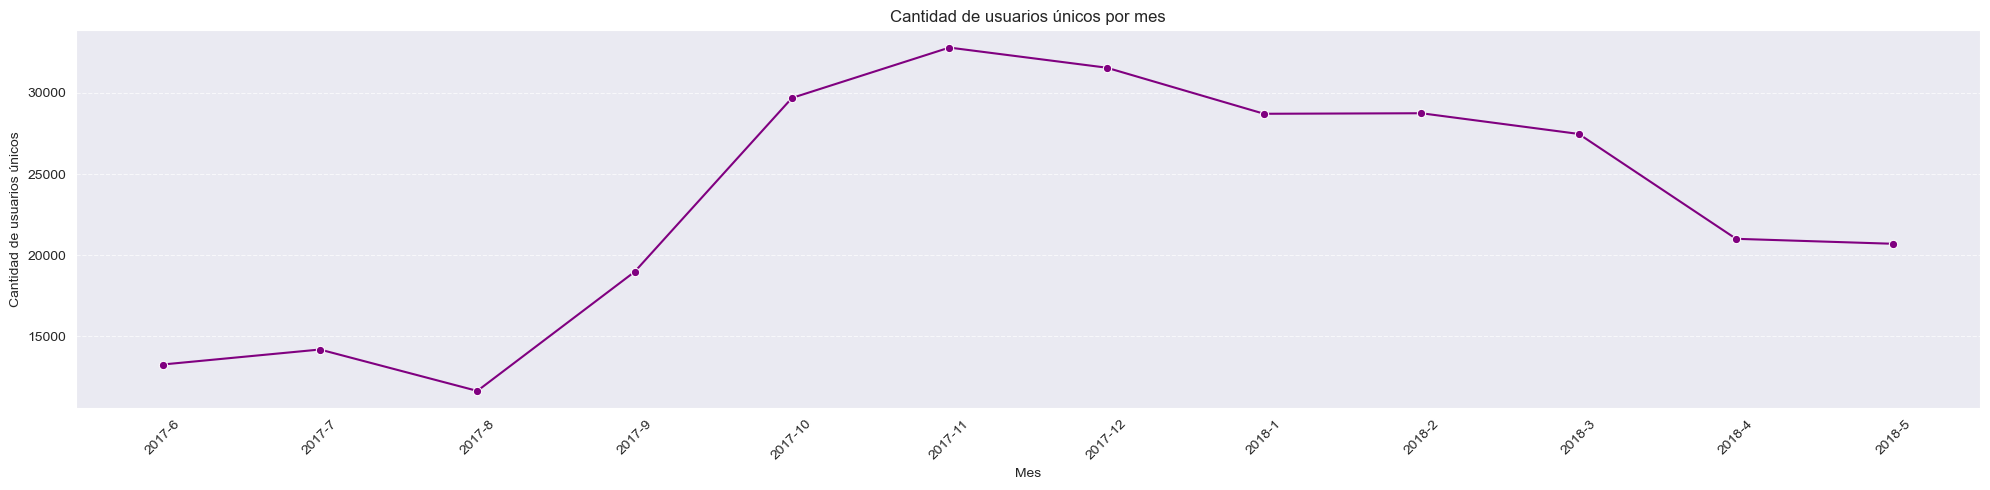

In [748]:
#grafico cantidad de usuarios únicos por mes

monthly_costumers = visits.groupby(['year', 'month'])['uid'].nunique().reset_index(name='costumer_count')

monthly_costumers['period'] = monthly_costumers['year'].astype(str) + '-' + monthly_costumers['month'].astype(str)

sns.set_style('dark')
plt.figure(figsize=(20, 5))
sns.lineplot(data=monthly_costumers, x='period', y='costumer_count', marker='o', color='purple')
plt.title('Cantidad de usuarios únicos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de usuarios únicos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [749]:
#Cuento la cantidad de sesiones por día:
session_per_day = visits.groupby('date')['uid'].count().reset_index(name='n_sessions')
print("""Sesiones por día:
    """,session_per_day)

#Calculo promedio de sesiones por día
mean_session_per_day = session_per_day['n_sessions'].mean()
print('Sesiones promedio por día: ', mean_session_per_day.round(2))


Sesiones por día:
                date  n_sessions
0    2017-06-01         664
1    2017-06-02         658
2    2017-06-03         477
3    2017-06-04         510
4    2017-06-05         893
..          ...         ...
359  2018-05-27         672
360  2018-05-28        1156
361  2018-05-29        1035
362  2018-05-30        1410
363  2018-05-31        2256

[364 rows x 2 columns]
Sesiones promedio por día:  987.36


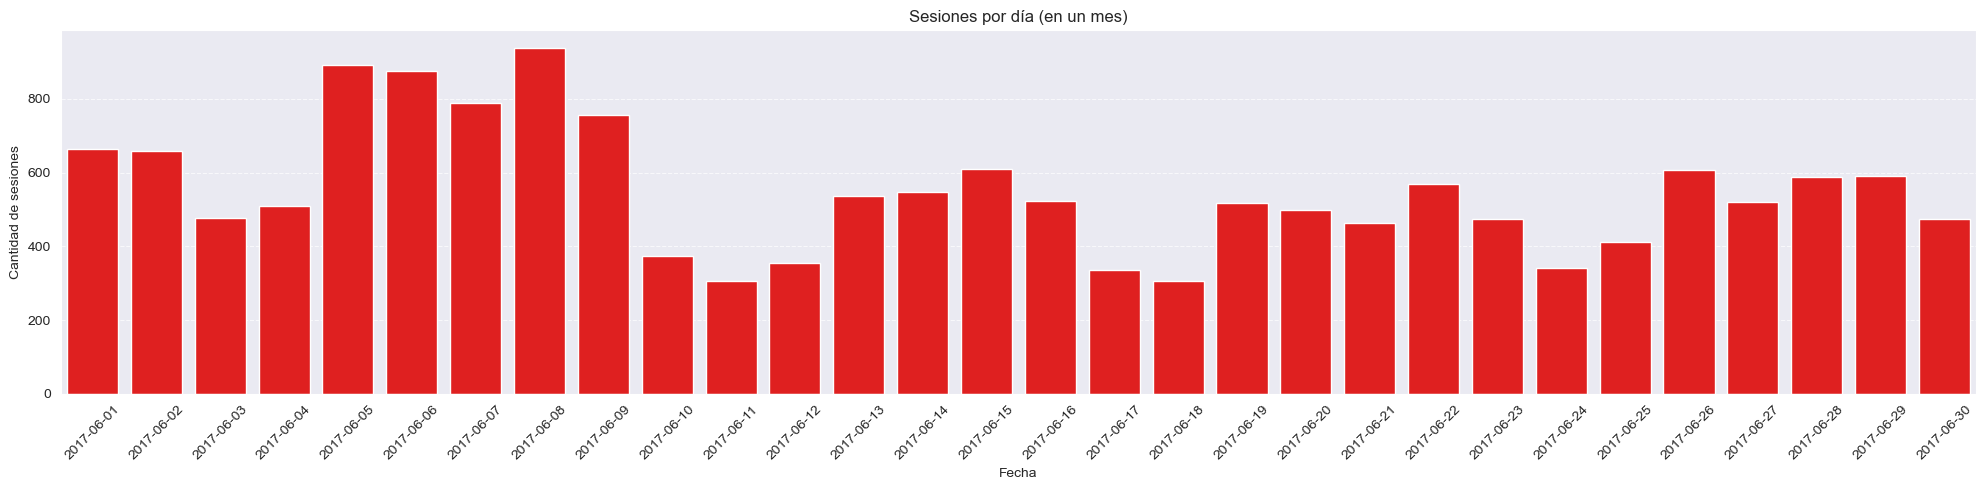

In [750]:
#grafico un mes de sesiones por dia
session_per_day['date'] = session_per_day['date'].astype(str)
session_per_day = session_per_day

sns.set_style('dark')
plt.figure(figsize=(20, 5))
sns.barplot(data=session_per_day.iloc[:30,:], x='date', y='n_sessions', color='red')
plt.title('Sesiones por día (en un mes)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de sesiones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [751]:
#Creo columna duración de las visitas ens segundos, y lo divido por 60 para tenerlo en minutos:
visits['duration(min)'] = (visits['end_ts'] - visits['start_ts']).dt.seconds / 60

#calculo promedio de duración de las visitas (ASL - Average Session Length)
ASL = visits.groupby('date')['duration(min)'].mean()
print('ASL: Duración promedio, en minutos, de las sesiones por día: ', ASL.mean().round(2))

ASL: Duración promedio, en minutos, de las sesiones por día:  10.36


### Ventas:
* ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)
* ¿Cuántos pedidos hacen durante un período de tiempo dado?
* ¿Cuál es el tamaño promedio de compra?
* ¿Cuánto dinero traen? (LTV)

In [752]:
#Calculo la fecha del primer pedido por usuario
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
first_order = orders.groupby('uid')['date'].min().reset_index(name='first_order_date')

#agrego esta columna al DF orders
orders = orders.merge(first_order, on='uid', how='left')

In [753]:
#creo columnas de primer mes de compra y mes de compra
orders['first_order_month'] = orders['first_order_date'].dt.to_period('M')
orders['order_month'] = orders['buy_ts'].dt.to_period('M')
print(orders.sample(5))

                   buy_ts  revenue                   uid       date  \
9810  2017-09-30 11:29:00     6.11   6731421022966725351 2017-09-30   
40761 2018-03-20 12:57:00     3.67    182767971566739712 2018-03-20   
22854 2017-12-08 17:18:00     0.92  14965665997290426363 2017-12-08   
40738 2018-03-20 11:07:00    12.22   3492825226713786880 2018-03-20   
31188 2018-01-26 15:55:00     0.92   9946547945525801048 2018-01-26   

      first_order_date first_order_month order_month  
9810        2017-08-30           2017-08     2017-09  
40761       2018-03-20           2018-03     2018-03  
22854       2017-12-08           2017-12     2017-12  
40738       2017-07-09           2017-07     2018-03  
31188       2017-11-24           2017-11     2018-01  


In [754]:
#agrupo por cohorte mensual y mes de compra para saber cuanto han gastado en cada mes de compra (ciclo de vida)

mensual_cohort = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()

mensual_cohort.rename(columns={'revenue':'monthly_revenue','uid': 'n_customers'}, inplace=True)


In [755]:
#calculo ciclo de vida y gasto promedio por cliente
mensual_cohort['cohort_lifetime'] = (mensual_cohort['order_month'] - mensual_cohort['first_order_month']).apply(lambda x: x.n)
mensual_cohort['revenue_per_customer'] = (mensual_cohort['monthly_revenue'] / mensual_cohort['n_customers']).round(2)

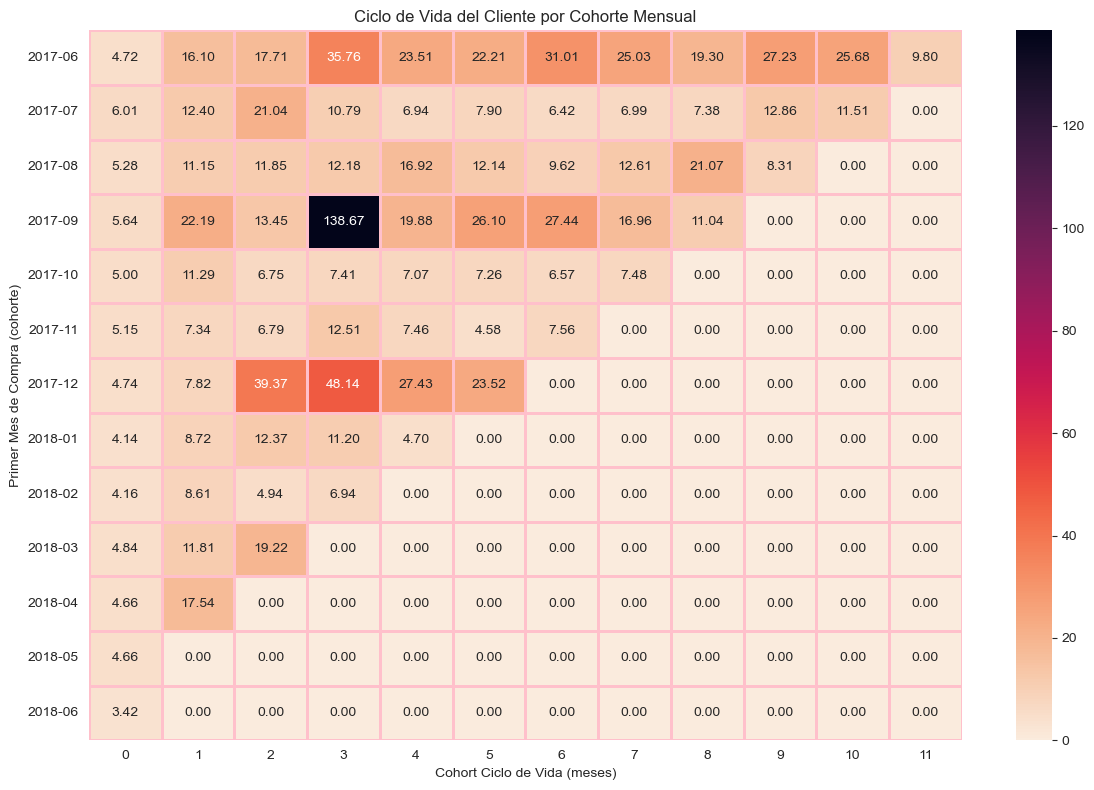

In [756]:
#para visualizar mejor los datos, creo una pivot table, que grafico en un heatmap
mensual_cohort_pivot = mensual_cohort.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue_per_customer', aggfunc='mean', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(mensual_cohort_pivot, annot=True, fmt='.2f', cmap=sns.color_palette('rocket_r',as_cmap=True), linewidths=1, linecolor='pink')
plt.title('Ciclo de Vida del Cliente por Cohorte Mensual')
plt.xlabel('Cohort Ciclo de Vida (meses)')
plt.ylabel('Primer Mes de Compra (cohorte)')
plt.tight_layout()
plt.show()

### Marketing:
 * ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 
 * ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
 * ¿Cuán rentables eran las inversiones? (ROMI)

In [757]:
#calculo LTV (lifetime value) por cohorte mensual
#LTV es el ingreso total generado por un cliente durante su ciclo de vida
ltv_per_cohort = mensual_cohort_pivot.sum(axis=1)
ltv_per_cohort.name = 'LTV'
ltv_per_cohort = ltv_per_cohort.reset_index()
print(ltv_per_cohort)

   first_order_month     LTV
0            2017-06  258.06
1            2017-07  110.24
2            2017-08  121.13
3            2017-09  281.37
4            2017-10   58.83
5            2017-11   51.39
6            2017-12  151.02
7            2018-01   41.13
8            2018-02   24.65
9            2018-03   35.87
10           2018-04   22.20
11           2018-05    4.66
12           2018-06    3.42


In [758]:
#promedio de LTV por cohortes
avg_ltv = ltv_per_cohort['LTV'].mean()
print(f'El LTV promedio, en general, por cohorte es: {avg_ltv:.2f}')

El LTV promedio, en general, por cohorte es: 89.54


In [759]:
#combino los datos de visitas con los costos para calcular CAC (Customer Acquisition Cost) 
#en un nuevo DF

#primero transformo las fechas a tipo datetime con el formato adecuado en todos los DFs
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d').dt.date
costs['date'] = pd.to_datetime(costs['date'], format='%Y-%m-%d').dt.date
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d').dt.date

#creo un DF con los usuarios, mes de cohorte y el canal de adquisición
client_cohort_channel = orders[['first_order_month', 'uid']]
client_cohort_channel = client_cohort_channel.merge(visits[['uid', 'source_id']], on='uid', how='left')
client_cohort_channel.columns = ['cohort', 'n_clients', 'source_id']
client_cohort_channel = client_cohort_channel.groupby(['cohort', 'source_id']).agg({'n_clients': 'nunique'}).reset_index()
print(client_cohort_channel.head())

    cohort  source_id  n_clients
0  2017-06          1        401
1  2017-06          2        457
2  2017-06          3        874
3  2017-06          4        644
4  2017-06          5        571


In [760]:
#calculo costos totales por source_id y mes de cohorte
costs_per_channel = costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
costs_per_channel.rename(columns={'month': 'cohort', 'costs': 'total_cost'}, inplace=True)
display(costs_per_channel.head(7))

,cohort,source_id,total_cost
0,2017-06,1,1125.61
1,2017-06,2,2427.38
2,2017-06,3,7731.65
3,2017-06,4,3514.80
4,2017-06,5,2616.12
5,2017-06,9,285.22
6,2017-06,10,314.22


In [761]:
#Combino ambos DFs y creo columna CAC (Customer Acquisition Cost): se divide el costo total por el número de clientes adquiridos

df_cac = pd.merge(costs_per_channel, client_cohort_channel, on=['cohort', 'source_id'], how='inner')
df_cac['CAC'] = (df_cac['total_cost'] / df_cac['n_clients']).round(2)

print(df_cac.head(5))

    cohort  source_id  total_cost  n_clients   CAC
0  2017-06          1     1125.61        401  2.81
1  2017-06          2     2427.38        457  5.31
2  2017-06          3     7731.65        874  8.85
3  2017-06          4     3514.80        644  5.46
4  2017-06          5     2616.12        571  4.58


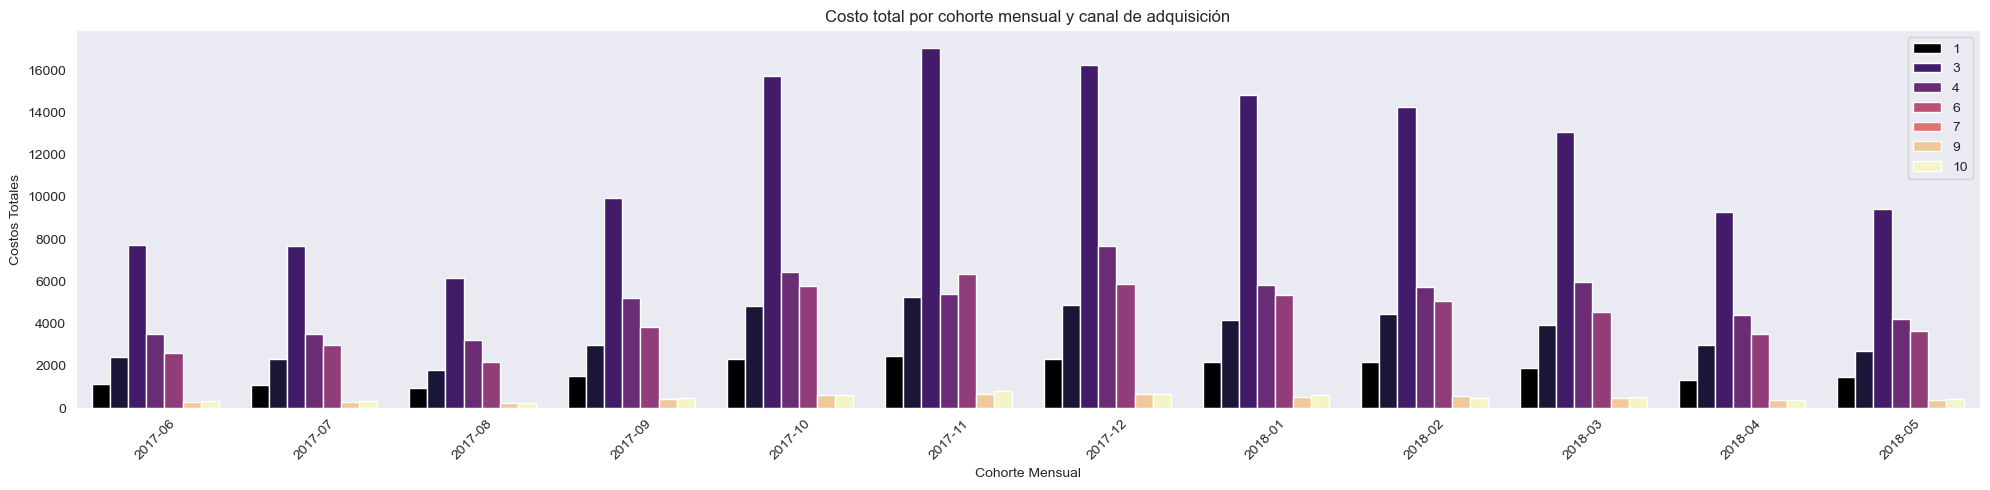

In [762]:
# Visualización de costo total por cohorte mensual y canal de adquisición
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cac, x='cohort', y='total_cost', palette="magma",  hue='source_id')


plt.title("Costo total por cohorte mensual y canal de adquisición")
plt.xlabel("Cohorte Mensual")
plt.ylabel("Costos Totales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

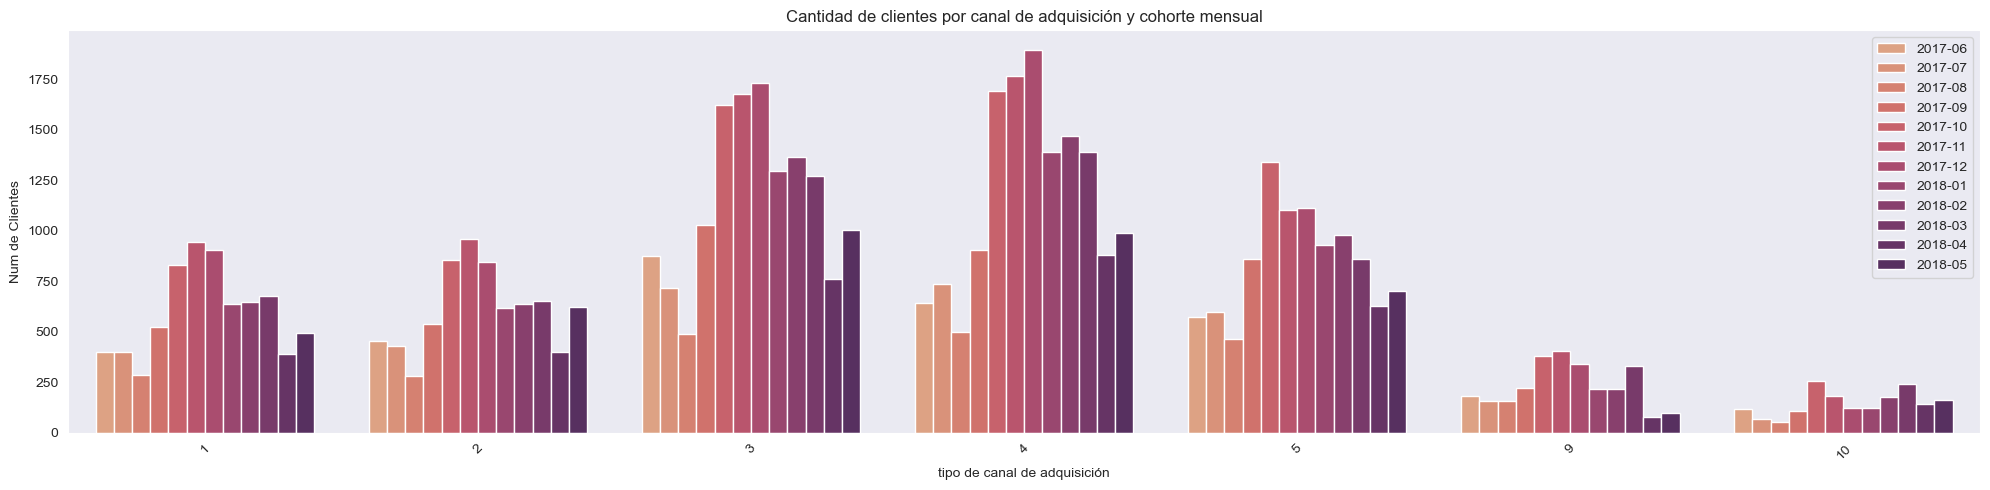

In [763]:
# Visualización de 
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cac, x='source_id', y='n_clients', palette="flare",  hue='cohort')


plt.title("Cantidad de clientes por canal de adquisición y cohorte mensual")
plt.xlabel("tipo de canal de adquisición")
plt.ylabel("Num de Clientes")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [764]:
#calculo el promedio del CAC (customer acquisition cost) por cohorte en general
cohort_avg_cac = df_cac.groupby('cohort')['CAC'].mean().round(2).reset_index()
cohort_avg_cac.rename(columns={'cohort': 'first_order_month', 'CAC': 'avg_CAC'}, inplace=True)
print(cohort_avg_cac.head(12))


   first_order_month  avg_CAC
0            2017-06     4.45
1            2017-07     5.03
2            2017-08     5.58
3            2017-09     4.90
4            2017-10     4.32
5            2017-11     4.71
6            2017-12     4.89
7            2018-01     5.59
8            2018-02     5.03
9            2018-03     4.61
10           2018-04     5.86
11           2018-05     4.62


In [ ]:
#calculo el ROMI (Return on Marketing Investment) por cohorte: el lifetime value (LTV) dividido por el customer acquisition cost (CAC)
#primero renombro la columna de cohortes en el df_cac para que coincida con el df_ltv
df_cac = df_cac.rename(columns={'cohort': 'first_order_month'})

#hago un merge entre el df_ltv y el df_cac para calcular el ROMI
df_romi = pd.merge(ltv_per_cohort, df_cac, on='first_order_month', how='inner')

#creo la columna ROMI
df_romi['ROMI']= df_romi['LTV'] / df_romi['CAC']
df_romi['ROMI'] = df_romi['ROMI'].round(2)
display(df_romi.sample(5))

,first_order_month,LTV,source_id,total_cost,n_clients,CAC,ROMI
13,2017-07,110.24,10,329.82,71,4.65,23.71
6,2017-06,258.06,10,314.22,120,2.62,98.50
41,2017-11,51.39,10,792.36,183,4.33,11.87
33,2017-10,58.83,9,609.41,381,1.60,36.77
75,2018-04,22.20,9,373.49,81,4.61,4.82


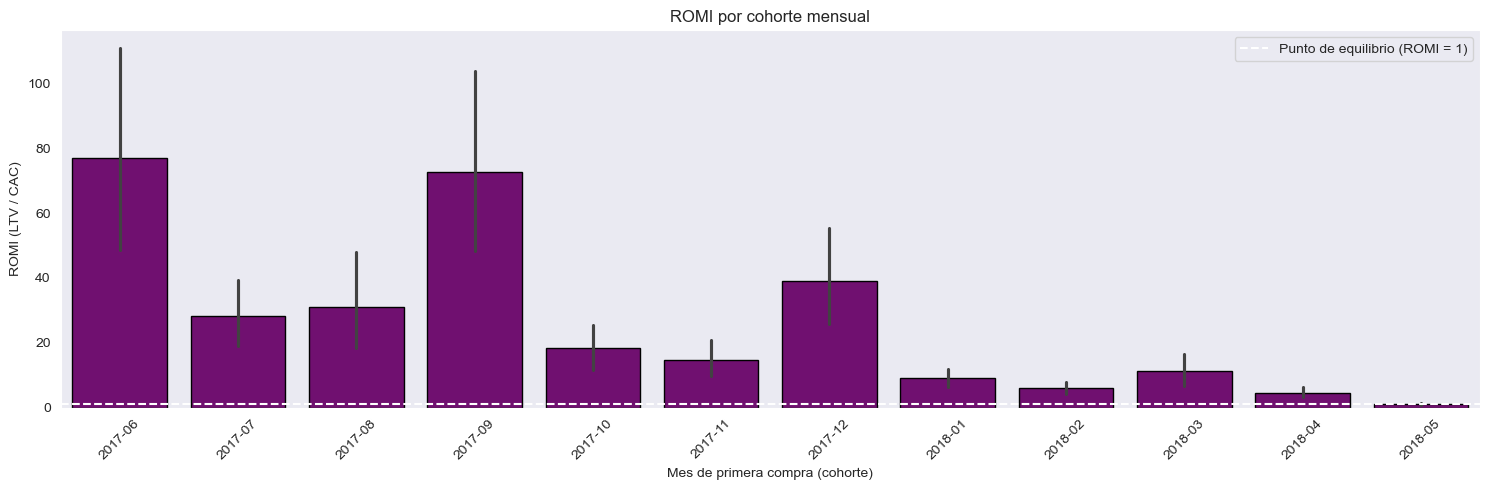

In [766]:
# Visualización de ROMI por cohorte con línea de referencia en ROMI = 1
plt.figure(figsize=(15, 5))
sns.barplot(data=df_romi, x='first_order_month', y='ROMI', color='purple', edgecolor='black')

# Línea horizontal de referencia en ROMI = 1
plt.axhline(1, color='white', linestyle='--', label='Punto de equilibrio (ROMI = 1)')


plt.title("ROMI por cohorte mensual")
plt.xlabel("Mes de primera compra (cohorte)")
plt.ylabel("ROMI (LTV / CAC)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 3) Conclusión: consejos para los expertos de marketing sobre cuánto dinero invertir y dónde

Teniendo en cuenta los datos estudiados se llegan a las siguientes conclusiones:

- Respecto a los datos de visitas al sitio :
* Duración promedio de las sesiones por día es de 10min.
* Promedio de usuarios activos por día es de 900, semanal de 5700 y mensual 23000.
* Entre los meses de octubre 2017 - marzo 2018, se llegaron a más de 25000 usuarios por mes, con su pico más alto en el mes de noviembre 2017: +30.000.

- Respecto a los datos de ventas:
* La cohorte de septiembre, muestra el mayor ingreso por cliente en el mes 4 de su ciclo: 138.67.
* El primer mes del ciclo de cada cohorte generó un ingreso por cliente de entre 3.42 - 6.01.
* Todas aumentan este ingreso en su segundo mes de vida: superior a 7 por cliente e incluso un max de 22.
* Se observa además que en todas las cohortes con más de dos meses de ciclo, su promedio por cliente aumentó con respecto al inicio.

- Respecto a costos:
* El promedio del ingreso generado por un cliente durante su ciclo de vida en general es de 89.
* El source_id 3 es el que genera mayor cantidad de costos a la companía. 
* Los source_id 4, 3 y 5, en este order, son los que atraen mayor cantidad de clientes.
* Los source_id 10 y 9, generan menor cantidad de ingreso de clientes que el resto.
* El promedio de costos por adquisicion de cliente es entre 4.32 y 5.86.
* Los meses de junio, septiembre y diciembre 2017 son los que el ROMI generó una gran diferencia para beneficio de la compañía. 

Después de estas observaciones, se llega a la conclusión: la source numero 4 es la que  genera la mayor cantidad de usuarios con menor costo que source_3. Esta última, es la más costosa pero genera la segunda mayor cantidad de clientes. Por último la source 5, que es de menor costo que las sources mencionadas y genera también gran número de clientes. Por estas razones son las fuentes en las que se sugiere invertir ya que son las que destacan en cada cohorte.

